In [ ]:
#This is a Prediction Problem

In [144]:
#Read data to local
import os

os.getcwd()

'E:\\Practice\\soccer'

In [145]:
#Import Libraries
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')


In [146]:
#Read Data from the Database into pandas
with sqlite3.connect('database.sqlite') as cnx:
    countries = pd.read_sql_query("SELECT * from Country", cnx)
    matches = pd.read_sql_query("SELECT * from Match", cnx)
    leagues = pd.read_sql_query("SELECT * from League", cnx)
    teams = pd.read_sql_query("SELECT * from Team", cnx)
    player=pd.read_sql_query("SELECT * from Player", cnx)
    df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [147]:
#Exploring data - headers
df.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [148]:
# Structures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [149]:
#Summary / Statistics of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [150]:
#shape
df.shape

(183978, 42)

In [151]:
#Columns
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [152]:
#Target
df['overall_rating'].head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [153]:
#stats of the target variable
df.overall_rating.describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

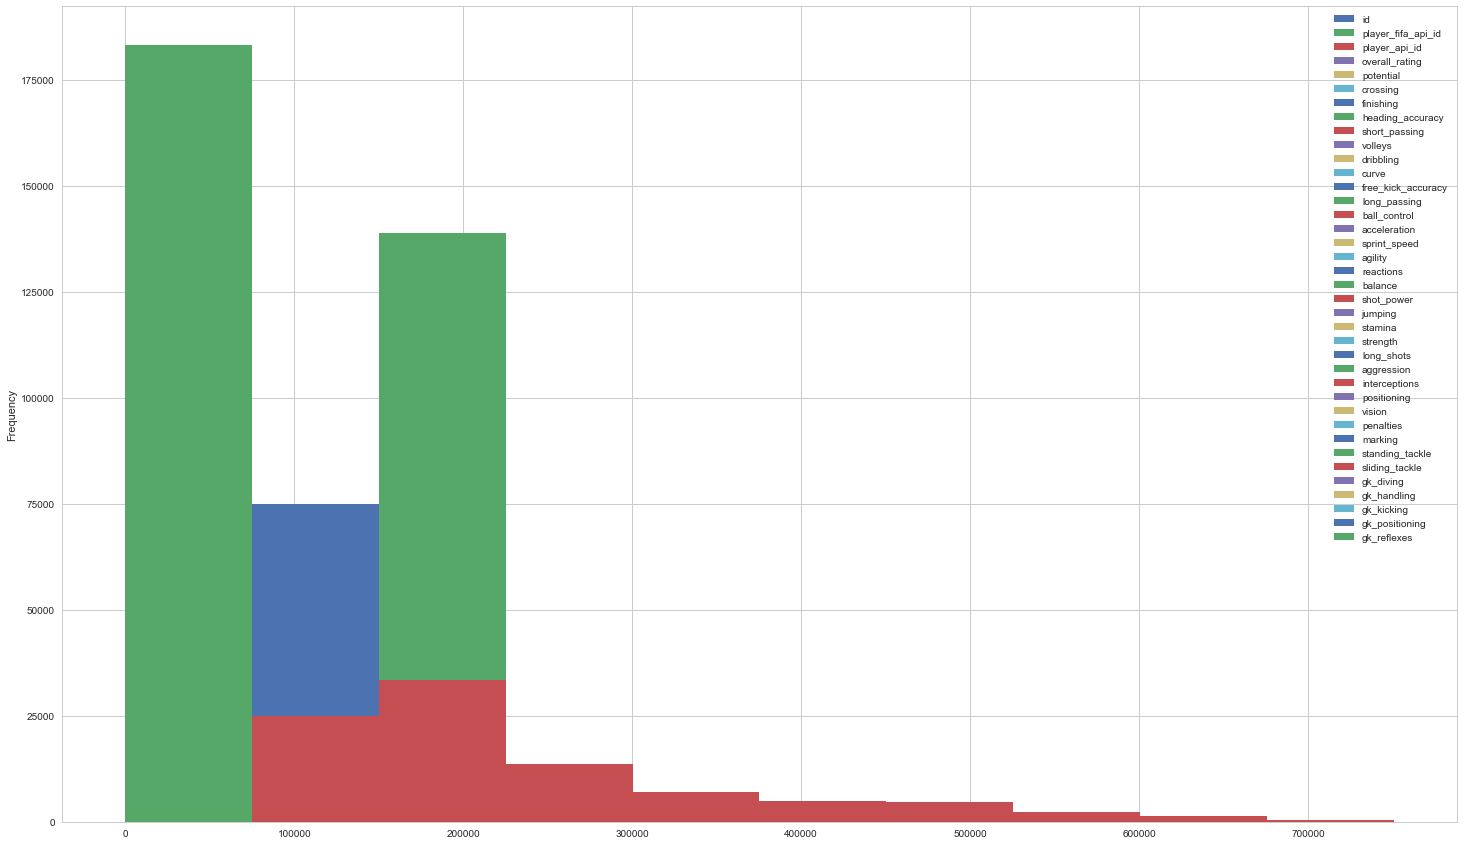

In [154]:
#Histogram plot of the data 
df.plot(kind='hist',figsize=(25,15))
plt.show()

In [155]:
#Determine the features and the target variable
features = ['potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [156]:
# Assigning the target and features to variable

X=df[features]
y=df['overall_rating']


In [157]:
#Splitting the data into training and testing set in the ratio 80:20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=1)

In [158]:
#missing data analysis by finding the total count of nulls(NAN) in each column and their percentage  
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())).sort_values(ascending=False)
all_data_na = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,all_data_na], axis=1, keys=['Total', 'Percent','Missing Ratio'])
missing_data.head(42)


,Total,Percent,Missing Ratio
attacking_work_rate,3230,0.017556,1.755645
volleys,2713,0.014746,1.474633
agility,2713,0.014746,1.474633
balance,2713,0.014746,1.474633
sliding_tackle,2713,0.014746,1.474633
jumping,2713,0.014746,1.474633
vision,2713,0.014746,1.474633
curve,2713,0.014746,1.474633
gk_reflexes,836,0.004544,0.454402
long_passing,836,0.004544,0.454402


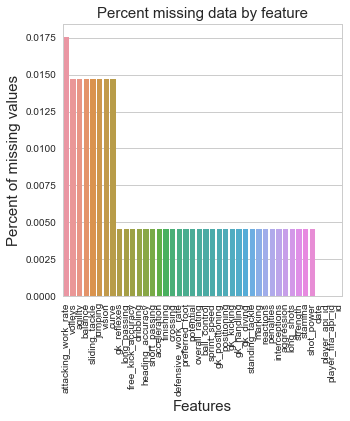

In [165]:
f, ax = plt.subplots(figsize=(5, 5))
plt.xticks(rotation='90')
sns.barplot(x=percent.index, y=percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

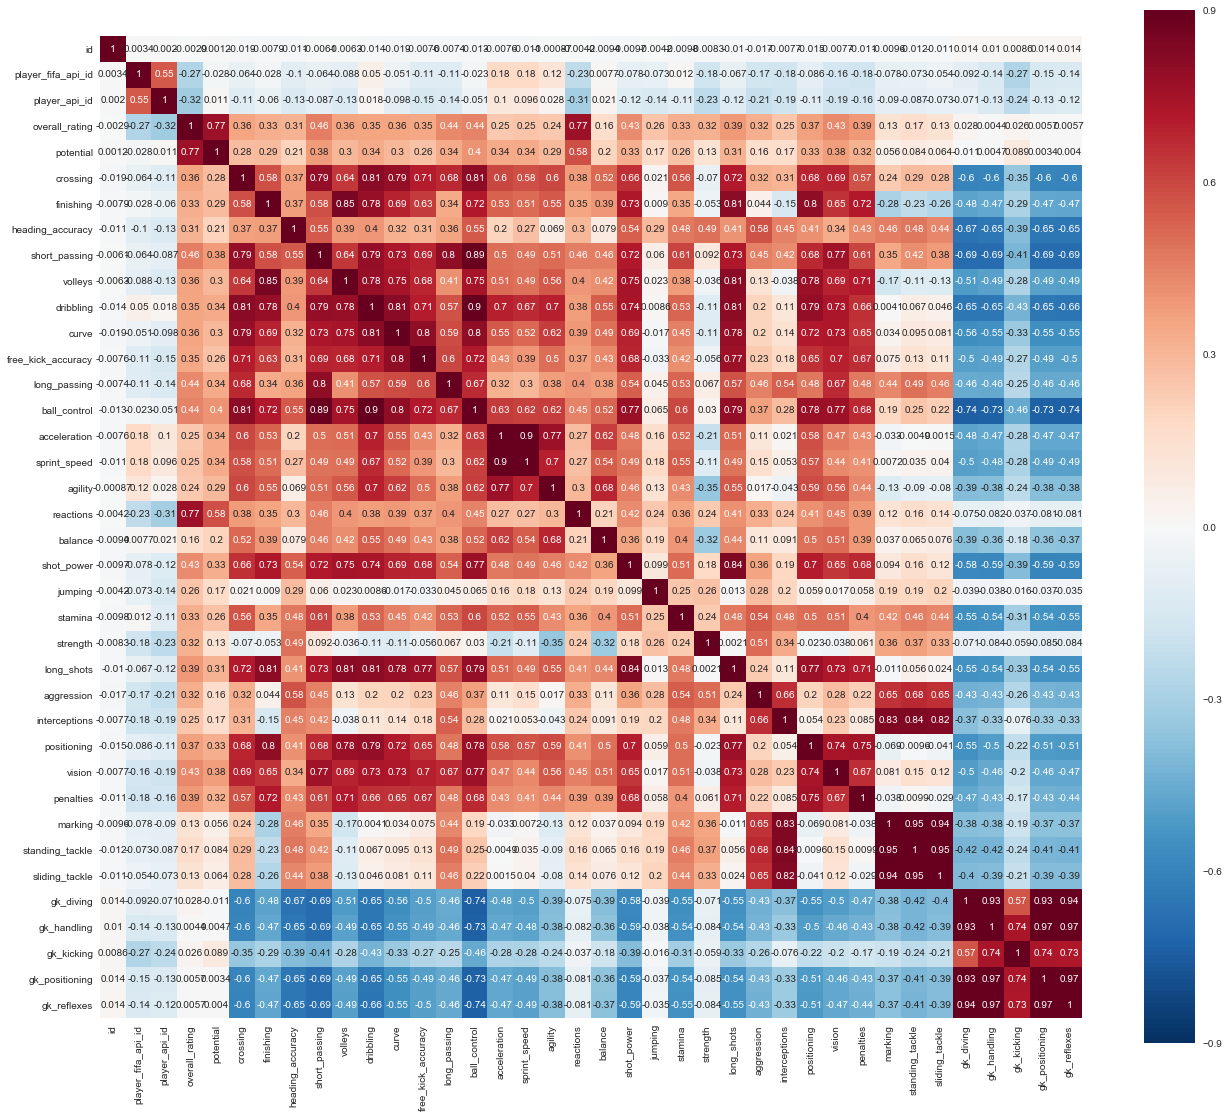

In [166]:
#Correlation map to see how features are correlated with Target
corrmat = df.corr()
plt.subplots(figsize=(22,19))
sns.heatmap(corrmat, annot=True,vmax=0.9,square=True)


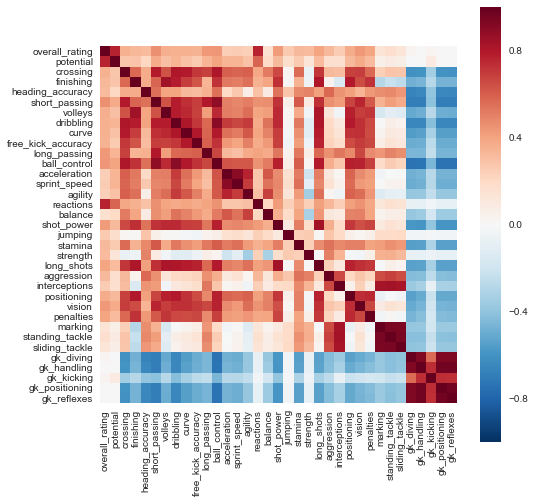

In [167]:
#Finding all the numearical features excluding the id's

corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 3:].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=1, square=True)

In [168]:
#Finding the correlation coeff of the numerical features with the target
cor_dict = corr['overall_rating'].to_dict()
del cor_dict['overall_rating']
print("List the numerical features decendingly by their correlation with overall_rating:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with overall_rating:

reactions: 	0.7692457630349638
potential: 	0.7667566857688645
short_passing: 	0.4583607386262931
ball_control: 	0.4442572228004608
long_passing: 	0.4350177802297149
vision: 	0.4311367988121981
shot_power: 	0.4279958125852591
penalties: 	0.3931887527385564
long_shots: 	0.39238163420820577
positioning: 	0.3700192122482373
volleys: 	0.36147004152737566
curve: 	0.3577716495801226
crossing: 	0.35769855309861265
dribbling: 	0.35432354521301374
free_kick_accuracy: 	0.34959233972370374
finishing: 	0.3292975103903036
stamina: 	0.3274556058350073
aggression: 	0.32393393386232117
strength: 	0.3186605064409473
heading_accuracy: 	0.3140994983162042
jumping: 	0.2590233994002736
sprint_speed: 	0.25484121894640943
interceptions: 	0.2503696336342525
acceleration: 	0.2456552320577401
agility: 	0.2398960269656689
standing_tackle: 	0.16534919736516085
balance: 	0.1603637746023709
marking: 	0.13337650853579372
sliding_tackle

In [169]:
#Categorical Features
print(df.select_dtypes(include=['object']).columns.values)

['date' 'preferred_foot' 'attacking_work_rate' 'defensive_work_rate']


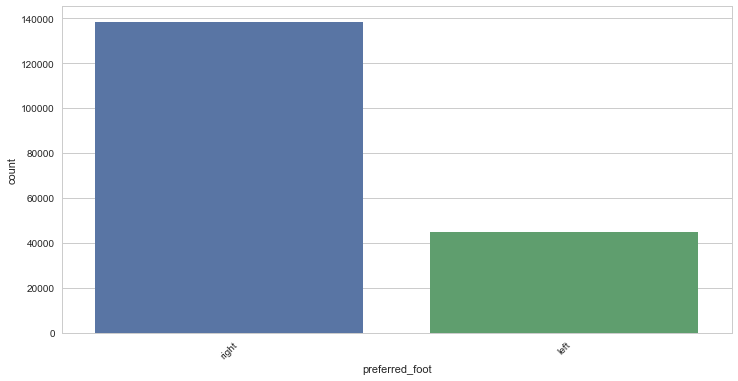

In [27]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'preferred_foot', data = df)
xt = plt.xticks(rotation=45)

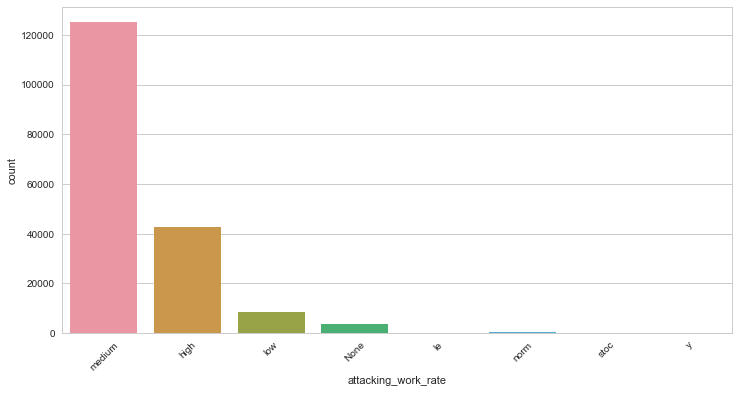

In [170]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'attacking_work_rate', data = df)
xt = plt.xticks(rotation=45)

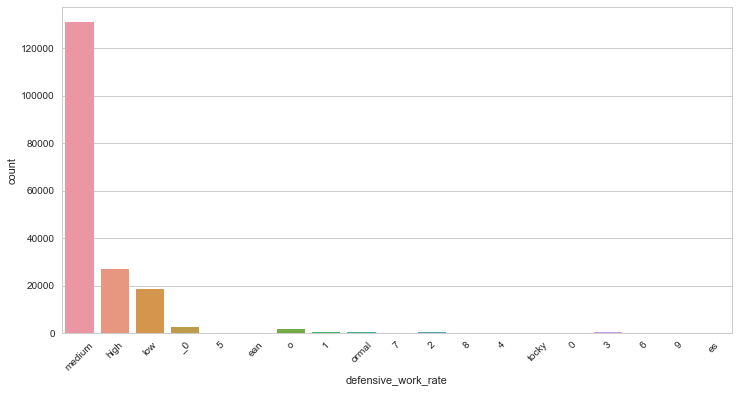

In [171]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'defensive_work_rate', data = df)
xt = plt.xticks(rotation=45)

In [172]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [173]:
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [174]:
df[df['attacking_work_rate']=='None'].head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
675,676,204171,194479,2016-03-24 00:00:00,73.0,75.0,right,None,5,64.0,...,71.0,68.0,44.0,36.0,24.0,8.0,14.0,14.0,8.0,13.0
676,677,204171,194479,2016-02-25 00:00:00,72.0,74.0,right,None,5,64.0,...,71.0,68.0,44.0,36.0,24.0,8.0,14.0,14.0,8.0,13.0
677,678,204171,194479,2016-01-07 00:00:00,72.0,74.0,right,None,5,64.0,...,74.0,68.0,44.0,36.0,24.0,8.0,14.0,14.0,8.0,13.0
678,679,204171,194479,2015-09-21 00:00:00,72.0,74.0,right,None,5,64.0,...,74.0,68.0,44.0,36.0,24.0,8.0,14.0,14.0,8.0,13.0
679,680,204171,194479,2015-07-03 00:00:00,71.0,73.0,right,None,5,60.0,...,73.0,67.0,43.0,35.0,23.0,7.0,13.0,13.0,7.0,12.0


In [175]:
df[df['attacking_work_rate']=='le'].head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
925,926,192670,176302,2010-08-30 00:00:00,62.0,66.0,right,le,ean,61.0,...,60.0,56.0,52.0,54.0,47.0,8.0,9.0,12.0,15.0,11.0
926,927,192670,176302,2010-02-22 00:00:00,54.0,57.0,right,le,ean,43.0,...,60.0,48.0,48.0,48.0,47.0,3.0,23.0,49.0,23.0,23.0
927,928,192670,176302,2009-08-30 00:00:00,53.0,57.0,right,le,ean,43.0,...,60.0,48.0,48.0,48.0,47.0,3.0,23.0,49.0,23.0,23.0
928,929,192670,176302,2007-02-22 00:00:00,53.0,57.0,right,le,ean,43.0,...,60.0,48.0,48.0,48.0,47.0,3.0,23.0,49.0,23.0,23.0
3233,3234,183243,121923,2009-02-22 00:00:00,68.0,71.0,right,le,ean,49.0,...,NaN,50.0,21.0,22.0,NaN,9.0,21.0,53.0,21.0,21.0


In [176]:
df[df['attacking_work_rate'].isnull()].head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,374,156626,46447,2010-08-30 00:00:00,64.0,71.0,right,None,_0,41.0,...,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,375,156626,46447,2010-02-22 00:00:00,64.0,71.0,right,None,_0,41.0,...,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,376,156626,46447,2008-08-30 00:00:00,66.0,71.0,right,None,_0,41.0,...,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,377,156626,46447,2007-08-30 00:00:00,68.0,75.0,right,None,_0,41.0,...,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,378,156626,46447,2007-02-22 00:00:00,66.0,65.0,right,None,_0,41.0,...,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0


In [177]:
df['attacking_work_rate'].isnull().sum()

3230

In [178]:
# Impute missing data for categorical features
for col in ('preferred_foot' ,'attacking_work_rate' ,'defensive_work_rate'):
    df[col] = df[col].fillna('None') 
    

In [179]:
# Impute missing data for numeric features
numeric_feats = df.dtypes[df.dtypes != "object"].index
numeric_feats

Index(['id', 'player_fifa_api_id', 'player_api_id', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [180]:
numeric_feats=df.select_dtypes(include = ['float64', 'int64']).columns.values
tmp= pd.DataFrame(numeric_feats)
tmp[0]
for col in tmp[0]:
    df[col] = df[col].fillna(df[col].mean(), inplace=False)

In [181]:
#missing data analysis by finding the total count of nulls(NAN) in each column and their percentage
#there should be no missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())).sort_values(ascending=False)
all_data_na = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,all_data_na], axis=1, keys=['Total', 'Percent','Missing Ratio'])
missing_data.head(42)

,Total,Percent,Missing Ratio
gk_reflexes,0,0.0,0.0
finishing,0,0.0,0.0
ball_control,0,0.0,0.0
long_passing,0,0.0,0.0
free_kick_accuracy,0,0.0,0.0
curve,0,0.0,0.0
dribbling,0,0.0,0.0
volleys,0,0.0,0.0
short_passing,0,0.0,0.0
heading_accuracy,0,0.0,0.0


In [182]:
df.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [183]:
#Transforming some numerical variables that are really categorical
df['date']=df['date'].astype(str)

In [184]:
#Apply label encoder for the categorical variables
cat_feat=df.select_dtypes(include=['object']).columns.values
cat_feat

array(['date', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate'], dtype=object)

In [185]:
from sklearn.preprocessing import LabelEncoder
tmp_cat_feat=pd.DataFrame(cat_feat)
tmp_cat_feat


,0
0,date
1,preferred_foot
2,attacking_work_rate
3,defensive_work_rate


In [186]:
for col in tmp_cat_feat[0]:
    lbl = LabelEncoder() 
    lbl.fit(list(df[col].values)) 
    df[col] = lbl.transform(list(df[col].values))
    
    

In [187]:
#Determine the features and the target variable
features = ['potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

# Assigning the target and features to variable

X=df[features]
y=df['overall_rating']

#Splitting the data into training and testing set in the ratio 80:20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=7)


In [188]:
#Define a cross validation strategy using the cross_val_score function of Sklearn.
from sklearn.linear_model import ElasticNet, LassoCV
from sklearn.model_selection import cross_val_score
import numpy as np
#Define a function that will return the cross-validation rmse error so we can evaluate our models and pick the best tuning parameter

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [189]:
#Linear Model
model_linear=LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [190]:
## Check trained model y-intercept
print("Intercept :",model_linear.intercept_)
# Check trained model coefficients
print("Co-efficient:",model_linear.coef_)

Intercept : -3.08769629333
Co-efficient: [ 0.37847837  0.01466858 -0.02330789 -0.0296285   0.0216576   0.01167742
  0.06937254  0.05090011  0.00321095 -0.01184735  0.01091939  0.01366169
  0.00640761  0.13766344  0.006948    0.00948642 -0.00952877  0.20802667
  0.00704465  0.01691014  0.01545347 -0.00498815  0.06167334 -0.01309233
  0.01967476  0.01207326 -0.0098036  -0.00307344  0.01353515  0.0334693
  0.00362436 -0.02902914  0.16706292  0.03184379 -0.03302645  0.05478431
  0.02366622]


In [191]:
#Findthe Co-efficient of determination R^2 of the Linear model for testing
print("Co-efficient of determination score :",model_linear.score(X_test,y_test))

Co-efficient of determination score : 0.84027602206


In [192]:
#Findthe Co-efficient of determination R^2 of the Linear model for training
print("Co-efficient of determination score :",model_linear.score(X_train,y_train))

Co-efficient of determination score : 0.841711385113


In [193]:
# make predictions on the testing set
y_pred = model_linear.predict(X_test)

In [194]:
#mean square error
mean_squared_error(y_pred, y_test)

7.8035806204873035

In [195]:
## compute the RMSE(Root mean square error) of our predictions for Linear regression
RMSE=mean_squared_error(y_pred, y_test)**0.5
RMSE

2.7934889691007023

In [196]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.84


In [197]:
#How the model performs on data by evaluating cross validation score
score = rmse_cv(model_linear)
print("Linear score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear score: 2.7995 (0.0057)



In [198]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [199]:
#Findthe Co-efficient of determination R^2 of the Lasso model for training
print("Co-efficient of determination score :",model_lasso.score(X_train,y_train))

Co-efficient of determination score : 0.841711349266


In [200]:
#Findthe Co-efficient of determination R^2 of the Lasso model for test
print("Co-efficient of determination score :",model_lasso.score(X_test,y_test))

Co-efficient of determination score : 0.840275579095


In [201]:
score = rmse_cv(model_lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 2.7995 (0.0057)



In [202]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 37 variables and eliminated the other 0 variables


In [203]:
coef = pd.Series(model_linear.coef_, index = X_train.columns)
print("Linear picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Linear picked 37 variables and eliminated the other 0 variables


In [204]:
#Random Forest for regression chosen for 100 trees and random selection of 20 features
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor(n_estimators=100, max_features=20).fit(X_train, y_train)

In [207]:
#root mean square error using cross validation
score = rmse_cv(model_RF)
print("\n Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 Random Forest score: 0.9183 (0.0064)



In [208]:
#Findthe  R^2 of the Random Forest model testing
print("R^2 score :",model_RF.score(X_test,y_test))

R^2 score : 0.986004020262


In [209]:
#Findthe  R^2 of the Random Forest training
print("R^2 score :",model_RF.score(X_train,y_train))

R^2 score : 0.997482117815


In [210]:
# make predictions on the testing set Random Forest
y_pred = model_RF.predict(X_test)

In [211]:
## compute the RMSE(Root mean square error) of our predictions for Random Forest regression
RMSE=mean_squared_error(y_pred, y_test)**(0.5)
RMSE

0.82692011126230658

In [212]:
#Printing the scroes of features selected by random forest regressor
print ("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model_RF.feature_importances_), X), 
             reverse=True))

Features sorted by their score:
[(0.35020000000000001, 'reactions'), (0.2296, 'potential'), (0.10440000000000001, 'ball_control'), (0.045999999999999999, 'standing_tackle'), (0.035799999999999998, 'short_passing'), (0.021999999999999999, 'positioning'), (0.021299999999999999, 'marking'), (0.0207, 'gk_diving'), (0.019900000000000001, 'heading_accuracy'), (0.016199999999999999, 'gk_positioning'), (0.0126, 'dribbling'), (0.0124, 'shot_power'), (0.0121, 'interceptions'), (0.010999999999999999, 'strength'), (0.010699999999999999, 'gk_handling'), (0.0094000000000000004, 'crossing'), (0.0091999999999999998, 'gk_reflexes'), (0.0089999999999999993, 'finishing'), (0.0063, 'long_shots'), (0.0047000000000000002, 'sliding_tackle'), (0.0043, 'stamina'), (0.0041999999999999997, 'aggression'), (0.0032000000000000002, 'vision'), (0.0030999999999999999, 'sprint_speed'), (0.0030000000000000001, 'long_passing'), (0.0025999999999999999, 'acceleration'), (0.0023999999999999998, 'volleys'), (0.00239999999999